# Assignment Sheet 5  

Bruce Schultz  
bschultz@uni-bonn.de  
  
Miguel A. Ibarra-Arellano  
ibarrarellano@gmail.com  
  
### Exercise 1  
#### Part a  
**Define a 15 x 15 kernel (k1), where all non-diagonal elements are set to zero, and on the diagonal to 1/15 . Use convolution to filter the brain image with the given kernel. (3P) What effect does this filter have on the input image? (1P)**

In [4]:
import numpy as np
from scipy import ndimage
from skimage import feature
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['image.cmap'] = 'gray'
# np.set_printoptions(threshold=np.nan)  # For showing whole numpy array

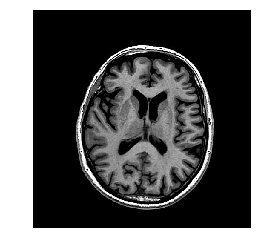

In [9]:
# Read image
brain_img = plt.imread('axial-brain.jpg')
plt.imshow(brain_img)
plt.axis('off')
plt.show()

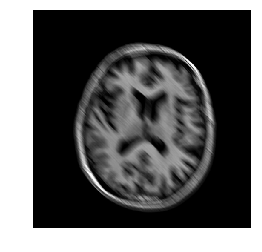

In [12]:
# Create kernel 1
diag = [1/15] * 15
kernel_1 = np.diag(diag)  # Create diagonal matrix from above array

# Convolution filter image with diagonal kernel - kernel 1
convo_img_1 = ndimage.convolve(brain_img, kernel_1)
plt.imshow(convo_img_1)
plt.axis('off')
plt.imsave('kernel_1.png', convo_img_1)

By applying this diagonal kernel to the image, the image is blurred/less defined in a diagonal manner since we are taking the average of the pixel intensities. Many pixels are surrounded by pixels with little to no intensity (i.e. ~0) and this decreases the overal intensity for most of the pixels. However, this also causes the originally black pixels that were close to pixels with values greater than 0 to now have a value greater than 0 as well. This is what causes the blurring effect. 
  
#### Part b  
**Repeat the last task with a new 15 x 15 kernel (k2), with all the elements being zero everywhere, except the elements on 8th row (if we start counting at one) are set to 1/15 . What is the effect of applying this filter on the input image? (1P)**

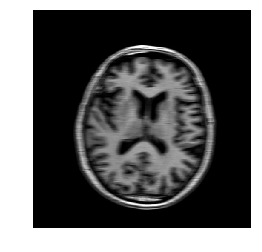

In [14]:
# Create kernel 2 and apply it
kernel_2 = np.zeros((15, 15))
kernel_2[7] = diag  # Index 7 is row 8
convo_img_2 = ndimage.convolve(brain_img, kernel_2)
plt.axis('off')
plt.imshow(convo_img_2)  # For jupyter notebook
plt.imsave('kernel_2.png', convo_img_2)

This kernel also blurs the image since each pixel value is replaced by the average of all the pixels in the middle of the kernel. This kernel causes a blurring of the edges in the same manner as discussed in part a, only now the blurring is most noticeable on the left and right edges and less so on the top and bottom.  
  
#### Part c   
**Briefly explain what is the difference between applying both filters k1 and k2 on the image using different orders, i.e., once apply k1 first and then k2, and once k2 first and then k1? (2P)**

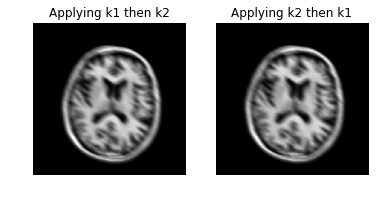

In [44]:
# Apply filters to img in different orders
convo_img_1then2 = ndimage.convolve(ndimage.convolve(brain_img, kernel_1), kernel_2)
convo_img_2then1 = ndimage.convolve(ndimage.convolve(brain_img, kernel_2), kernel_1)
fig, axes = plt.subplots(1, 2)
axes[0].axis('off')
axes[0].set_title('Applying k1 then k2')
axes[0].imshow(convo_img_1then2)

axes[1].axis('off')
axes[1].set_title('Applying k2 then k1')
axes[1].imshow(convo_img_2then1)

Because convolution is associative and commutative, it does not matter in what order you apply the filter since the values will ultimately be the same. Taking our image (B) and applying kernels k1 and k2 we get:  
New Image = k2 x (k1 x B) **or**  
New Image = k1 x (k2 x B)  
The result is the same in both cases  
  
### Exercise 2  
**Use Canny edge detection from the scikit-image library to detect edges of the input image at different scales sigma = {0:001; 1; 2; 3}. (3P) Combine the resulting edges at different scales into one grayscale image, with edges at finer scales having smaller intensity values, similar to Figure 1. (1P) By comparing the edge image to the input, what do you think is the role of sigma in detecting edges? (1P)**

Text(0.5,0.98,'Individual Canny Edge Images')

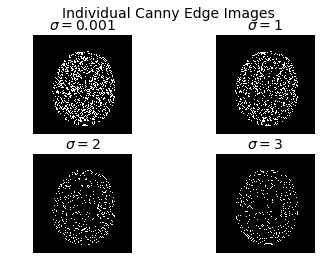

In [53]:
# Use Canny edge detection
canny_img1 = feature.canny(brain_img, sigma=0.001)
canny_img2 = feature.canny(brain_img, sigma=1)
canny_img3 = feature.canny(brain_img, sigma=2)
canny_img4 = feature.canny(brain_img, sigma=3)

# Display results
fig, ax = plt.subplots(2,2)

ax[0,0].imshow(canny_img1)
ax[0,0].axis('off')
ax[0,0].set_title('$\sigma=0.001$', fontsize=14)

ax[0,1].imshow(canny_img2)
ax[0,1].axis('off')
ax[0,1].set_title('$\sigma=1$', fontsize=14)

ax[1,0].imshow(canny_img3)
ax[1,0].axis('off')
ax[1,0].set_title('$\sigma=2$', fontsize=14)

ax[1,1].imshow(canny_img4)
ax[1,1].axis('off')
ax[1,1].set_title('$\sigma=3$', fontsize=14)

fig.suptitle("Individual Canny Edge Images", fontsize=14)

Text(0.5,1,'Canny composite image')

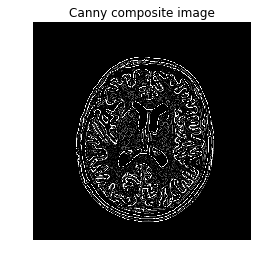

In [54]:
# Apply filters to canny images and combine
canny_composite = np.zeros(brain_img.shape)  # Copy original shape
canny_composite[canny_img1] = 25
canny_composite[canny_img2] = 75
canny_composite[canny_img3] = 125
canny_composite[canny_img4] = 255
plt.imshow(canny_composite)
plt.axis('off')
plt.title('Canny composite image')
# plt.show()